In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [4]:
df = data['frame']

In [5]:
# !!!don't run it again !!!
# data['frame'].to_csv('data/breastcancerdata.csv', index=False)

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
TEST_SIZE_RATIO = 0.3  # split into 2 train and test sets

# Setup X and y
X = df.iloc[:,:-1]
y = df.target

X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=0, shuffle=True)
print("X_train_0.shape, y_train.shape", X_train_0.shape, y_train.shape)
print("X_test_0.shape, y_test.shape", X_test_0.shape, y_test.shape)

X_train_0.shape, y_train.shape (398, 30) (398,)
X_test_0.shape, y_test.shape (171, 30) (171,)


feature reduction

<Axes: >

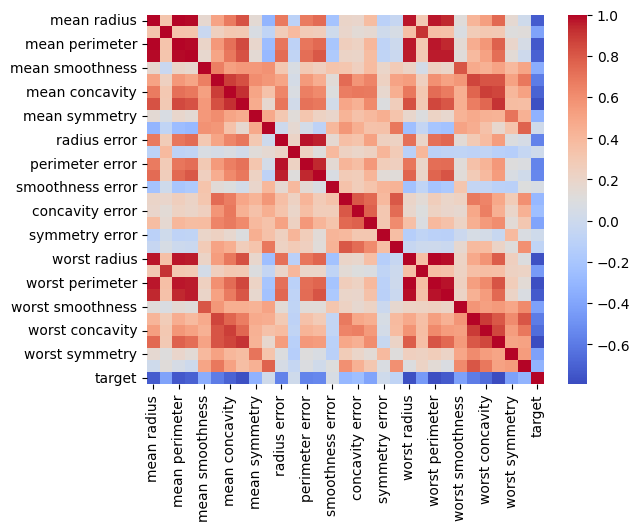

In [8]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [9]:
corr_target = df.corr()['target']
corr_target_sorted = corr_target.sort_values(ascending=False)
corr_target_sorted

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [10]:
# Only use features with a minimum pearson correlation with the target of 0.1 in positive side
low_correlation_ftrs = corr_target_sorted[(corr_target_sorted <= 0.1) & (corr_target_sorted > -0.1)]
low_correlation_ftrs

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
Name: target, dtype: float64

In [18]:
df.columns = df.columns.str.replace(' ','_')

In [19]:
df.drop(columns=['smoothness_error', 'mean_fractal_dimension', 'texture_error', 'symmetry_error', 'fractal_dimension_error'], axis = 1 , inplace = True)

In [42]:
def find_highly_corelated_pair(df):
        
    # Assuming you have a DataFrame named 'df' with multiple features
    correlation_matrix = df.corr().abs()  # Compute the correlation matrix with non negative values

    # Find highly correlated pairs
    highly_correlated_pairs = []

    # Iterate through the upper triangular matrix (excluding the diagonal)
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if correlation_matrix.iloc[i, j] > 0.8:  # Define your correlation threshold here
                pair = [correlation_matrix.columns[i], correlation_matrix.columns[j]]
                highly_correlated_pairs.append(pair)

    # Print highly correlated pairs
    return highly_correlated_pairs



In [43]:
eg=find_highly_corelated_pair(df)
eg


[['mean_radius', 'mean_perimeter'],
 ['mean_radius', 'mean_area'],
 ['mean_radius', 'mean_concave_points'],
 ['mean_radius', 'worst_radius'],
 ['mean_radius', 'worst_perimeter'],
 ['mean_radius', 'worst_area'],
 ['mean_texture', 'worst_texture'],
 ['mean_perimeter', 'mean_area'],
 ['mean_perimeter', 'mean_concave_points'],
 ['mean_perimeter', 'worst_radius'],
 ['mean_perimeter', 'worst_perimeter'],
 ['mean_perimeter', 'worst_area'],
 ['mean_area', 'mean_concave_points'],
 ['mean_area', 'area_error'],
 ['mean_area', 'worst_radius'],
 ['mean_area', 'worst_perimeter'],
 ['mean_area', 'worst_area'],
 ['mean_smoothness', 'worst_smoothness'],
 ['mean_compactness', 'mean_concavity'],
 ['mean_compactness', 'mean_concave_points'],
 ['mean_compactness', 'worst_compactness'],
 ['mean_compactness', 'worst_concavity'],
 ['mean_compactness', 'worst_concave_points'],
 ['mean_concavity', 'mean_concave_points'],
 ['mean_concavity', 'worst_concavity'],
 ['mean_concavity', 'worst_concave_points'],
 ['mea

remove the one from the highly corelated feature that is less corelated with the target

In [53]:
highly_corelated_pair = find_highly_corelated_pair(df)
remove_frts = set()
for pair in highly_corelated_pair:
    target_corr_f1 = df.corr()['target'][pair[0]]
    target_corr_f2 = df.corr()['target'][pair[1]]
    if target_corr_f1 >= target_corr_f2:
        remove_frts.add(pair[1])
    else:
        remove_frts.add(pair[0])
remove_frts = list(remove_frts)
print(remove_frts)

['worst_concavity', 'perimeter_error', 'worst_radius', 'mean_radius', 'worst_perimeter', 'worst_compactness', 'mean_perimeter', 'mean_concavity', 'radius_error', 'mean_concave_points', 'worst_texture', 'mean_area', 'mean_compactness', 'worst_smoothness', 'worst_area', 'compactness_error', 'worst_concave_points']


In [54]:
df_copy = df.copy()

In [56]:
df.drop(columns=remove_frts, axis=1, inplace=True)

In [57]:
df

,mean_texture,mean_smoothness,mean_symmetry,area_error,concavity_error,concave_points_error,worst_symmetry,worst_fractal_dimension,target
0,10.38,0.11840,0.2419,153.40,0.05373,0.01587,0.4601,0.11890,0
1,17.77,0.08474,0.1812,74.08,0.01860,0.01340,0.2750,0.08902,0
2,21.25,0.10960,0.2069,94.03,0.03832,0.02058,0.3613,0.08758,0
3,20.38,0.14250,0.2597,27.23,0.05661,0.01867,0.6638,0.17300,0
4,14.34,0.10030,0.1809,94.44,0.05688,0.01885,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.1726,158.70,0.05198,0.02454,0.2060,0.07115,0
565,28.25,0.09780,0.1752,99.04,0.03950,0.01678,0.2572,0.06637,0
566,28.08,0.08455,0.1590,48.55,0.04730,0.01557,0.2218,0.07820,0
567,29.33,0.11780,0.2397,86.22,0.07117,0.01664,0.4087,0.12400,0


<Axes: >

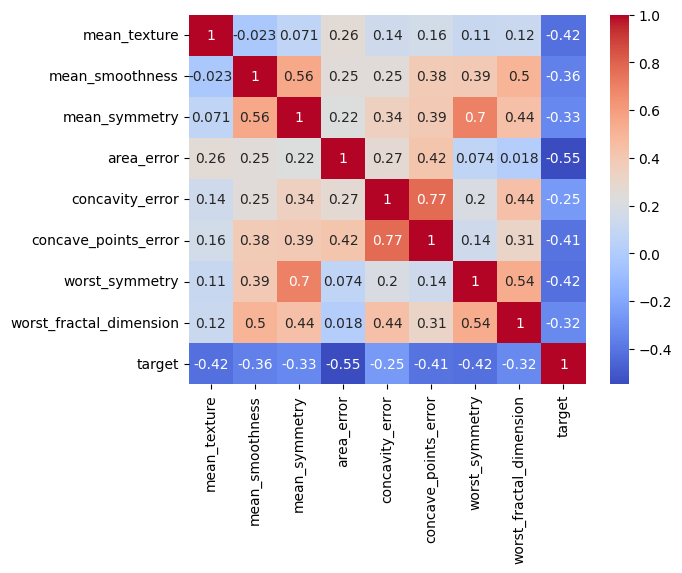

In [59]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_texture             569 non-null    float64
 1   mean_smoothness          569 non-null    float64
 2   mean_symmetry            569 non-null    float64
 3   area_error               569 non-null    float64
 4   concavity_error          569 non-null    float64
 5   concave_points_error     569 non-null    float64
 6   worst_symmetry           569 non-null    float64
 7   worst_fractal_dimension  569 non-null    float64
 8   target                   569 non-null    int32  
dtypes: float64(8), int32(1)
memory usage: 37.9 KB


In [63]:
df.to_csv('data/cleaned.csv', index=False)